In [12]:
#Michael Austin
#1295814
#Homework 2

import pandas as pd
import numpy as np
import statistics
from sklearn import linear_model
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.formula.api as sm
from scipy.spatial.distance import cdist
import math

%matplotlib inline

0. Transform the White Wine Quality dataset into a new 13D dataset called WWQ as follows: a. Normalize the first through 11th attribute into z-scores, b. Keep the 12th attribute ‘quality’ as it is, c. Introduce a new ordinal attribute called class (attribute 13) based on the value of the 12th attribute ‘quality’ as follows: 10-8:A, 7:B, 6:C, 5:D, 4-0:E

Remark: When clustering the dataset only the first 11 attributes will be used; attributes 12 and 13 will be used to evaluate the quality of a clustering result. *

In [13]:
#Z Score Conversion

df = pd.read_csv("winequality-white.csv")
df.columns = ['fixedAcidity', 'volatileAcidity', 'citricAcid', 'residualSugar', 'chlorides', 'freeSulfurDioxide', 'totalSulfurDioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
columns = list(df.columns)
columns.remove('quality')

for value in columns:
    
    df[value] = (df[value] - df[value].mean()) / df[value].std(ddof=0)


In [14]:
#Creation of class / Attribute 13

#It's easier to work with integers instead of characters later on, so I created class with the following values:
# 1:A, 2:B, 3:C, 4:D, 5:E

quality = df['quality'].values
classArray = []

for num in quality:
        
    if(8 <= num and num <= 10):        
        classArray.append('1')
        #A
        
    elif(num == 7):
        classArray.append('2')     
        #B
        
    elif(num == 6):
        classArray.append('3')     
        #C
        
    elif(num == 5):
        classArray.append('4')     
        #D
        
    elif(0 <= num and num <= 4):
        classArray.append('5')
        #E
        
df['class'] = classArray

WWQ = df

#print(WWQ)

1. Write an Python-function entropy(a,b) that computes the entropy and the pecentage of outliers of a clustering result based on an apriori given set of class lables, where a gives the assignment of objects in O to clusters, and b contains the class labels of the examples in O.

In [15]:
#1st test case

a1 = (0,1,1,1,1,2,2,3)
b1 = ('A','A','A','E','E','D','D','C') #class labels associated w/ those clusters

#2nd test case

a2 = (1,1,1,0,0,2,2,2)
b2 = ('A','A','A','E','E','D','D','C')

#print('aKeys:', aKeys)
#print('aFreq:', aFreq)
#print('aFreq Sum:', sum(aFreq))

def entropy(a, b):
    
    a = list(a)
    
    totalFreq = list(Counter(a).values())    
    
    b = list(b)
    
    newA = []
    newB = []
    
    outlierCount = 0
    
    for i in range(len(a)):
        if(a[i] != 0):
            newA.append(a[i])
            newB.append(b[i])
        else:
            outlierCount += 1
            
    #print("newA: ", newA)
    #print("newB: ", newB)
            
    outlierPercentage =  (outlierCount / sum(totalFreq))    
    
    aKeys = list(Counter(newA).keys())  
    
    aFreq = list(Counter(newA).values())    

    labelEncoder = LabelEncoder()
    labelEncoder.fit(newB)
    newB = labelEncoder.transform(newB)
    bKeys = Counter(newB).keys()
    
    #print('aKeys: ', aKeys)
    
    #print("convertedB: ", newB)
    
    #print("aKeys: ", aKeys)
    #print("aFreq: ", aFreq)
    #print("bKeys: ", bKeys)

    H = 0

    for i in range(len(aKeys)):
        bVal = []
        bFreq = []
    
        for j in range(len(newB)):
            if(aKeys[i] == newA[j]):
            
                bVal.append(newB[j])
        
        bFreq = list(Counter(bVal).values())    
                    
        for k in range(len(bFreq)):
            
            setProportion = 0
            classProportion = 0
            
            if(((bFreq[k]) / sum(bFreq)) > 0):
            
                setProportion = (aFreq[i] / sum(aFreq))
                classProportion = (bFreq[k] / sum(bFreq))                
            
                H -= (setProportion * ((classProportion * math.log2(classProportion))))                                 
                
    vector = (H, outlierPercentage)
    
    return vector

print("Test Case 1 Vector: ", entropy(a1, b1),'\n')
print("Test Case 2 Vector: ", entropy(a2, b2))

    

Test Case 1 Vector:  (0.5714285714285714, 0.125) 

Test Case 2 Vector:  (0.4591479170272448, 0.25)


2. Write an Python-function ordinal-variation (a,b) that computes the original agreement of a bag b of ordinal classes associated with the instances of clusters given by a—the orignial classes are named A, B, C, D, and E in the WWQ dataset.

In [16]:
#1st test case

a1 = (0,1,1,1,1,2,2,3)
b1 = ('A','A','A','E','E','D','D','C') #class labels associated w/ those clusters

#2nd test case

a2 = (1,1,1,0,0,2,2,2)
b2 = ('A','A','A','E','E','D','D','C')

#print('aKeys:', aKeys)
#print('aFreq:', aFreq)
#print('aFreq Sum:', sum(aFreq))

def ordinalVariation(a, b):
    
    a = list(a)
    
    totalFreq = list(Counter(a).values())    
    
    b = list(b)
    
    newA = []
    newB = []
    
    for i in range(len(a)):
        if(a[i] != 0):
            newA.append(a[i])
            newB.append(b[i])
            
    #print("newA: ", newA)
    #print("newB: ", newB)               
    
    aKeys = list(Counter(newA).keys())
    
    #print("aKeys: ", aKeys)
    
    aFreq = list(Counter(newA).values())    
    
    bPrime = []

    for letter in newB:
        
        if(letter == 'A'):        
            bPrime.append(4)        
        
        elif(letter == 'B'):        
            bPrime.append(3)
        
        elif(letter == 'C'):        
            bPrime.append(2)
        
        elif(letter == 'D'):        
            bPrime.append(1)        
        
        elif(letter == 'E'):        
            bPrime.append(0)
            
    #print("bPrime: ", bPrime)
    
    bKeys = list(Counter(bPrime).keys())
    
    #print("newA:", newA)
    #print("bKeys:", bKeys)    
    
    #ordinalVar = 0
    
    #for i in range(len(aKeys)):
        #bVal = []
        #bFreq = []
    
        #for j in range(len(bPrime)):
            #if(aKeys[i] == newA[j]):
            
                #bVal.append(bPrime[j])
                
        #print("bVal: ", bVal)        
        
        #bFreq = list(Counter(bVal).values())
        
    df = pd.DataFrame({
    'clust': newA,
    'class': newB,
    'p': bPrime
    }, columns = ['clust', 'class', 'p'])
        
    cluster = list(set(newA))
    clusterLen = len(cluster)
    
    Class = list(set(newB))    
    classLen = len(Class)
    
    totalShape = df.shape[0]

    first = []
    for c in range(1, max(cluster)+1):
        
        uniqueVal = df.loc[df['clust'] == c]
        second = []
        prop = uniqueVal.shape[0]/totalShape
        
        if classLen > 1:
            for i in uniqueVal['p']:
                for j in uniqueVal['p']:
                    
                    if(i != j):
                        second.append(abs(i-j))
                        
        else:
            second.append(0)
            
        first.append(prop * sum(second))
    return sum(first)/(classLen**2 - classLen) 


print("Test Case 1 Ord. Var.: ", ordinalVariation(a1, b1),'\n')
print("Test Case 2 Ord. Var.: ", ordinalVariation(a2, b2))    


Test Case 1 Ord. Var.:  1.5238095238095237 

Test Case 2 Ord. Var.:  0.3333333333333333


3. Write an Python-function variance(a,b) which computes the variance of the clustering
result X based on an apriori given set of numerical observations—one numerical observation is
associated with with each object, where a gives the assignment of objects in O to clusters, and
b is the numerical observation associated with each object in O. The variance of a clustering is
the weighted sum of the variance6 observed in each cluster with respect to the numerical
variable. The observed cluster variance is weighted by number_of_example_in_the
cluster/total number of examples in all clusters; the same way how variance is assessed by
regression tree learning algorithms.

In [17]:
#1st test case

a1 = (0,1,1,1,1,2,2,3)
c1 = (8,8,8,4,4,5,5,6) #class labels associated w/ those clusters

#2nd test case

a2 = (1,1,1,0,0,2,2,2)
c2 = (8,8,8,4,4,5,5,6)

#print('aKeys:', aKeys)
#print('aFreq:', aFreq)
#print('aFreq Sum:', sum(aFreq))

def variance(a, c):
    
    a = list(a)
    
    totalFreq = list(Counter(a).values())    
    
    c = list(c)
    
    newA = []
    newC = []
    
    for i in range(len(a)):
        if(a[i] != 0):
            newA.append(int(a[i]))
            newC.append(int(c[i]))
            
    #print("newA: ", newA)
    #print("newC: ", neC)               
    
    aKeys = list(Counter(newA).keys())   
    
    aFreq = list(Counter(newA).values())    
    
    totalVar = 0
    
    for i in range(len(aKeys)):
        cVal = []
        cFreq = []
    
        for j in range(len(newC)):
            if(aKeys[i] == newA[j]):
            
                cVal.append(newC[j])
                
        #print('cVal: ', cVal)  
        
        if(1 < len(cVal)):
        
            currVar = statistics.variance(cVal)   
        
            #print('currVar: ', currVar)       
                    
            setFrequency = (aFreq[i] / sum(aFreq))
        
           # print("Freq: ", setFrequency)
        
            totalVar += setFrequency * currVar
        
    return totalVar   

print("Test Case 1 Variance: ", variance(a1, c1),'\n')
print("Test Case 2 Variance: ", variance(a2, c2))  

Test Case 1 Variance:  3.0476190476190474 

Test Case 2 Variance:  0.16666666666666666


4. Write an Python-function mdist(d) that takes a dataframe d containing only continous
attributes as its input, transforms the attribute values in d into z-scores, and then returns a
distance matrix7 of the Manhattan distances of the objects in the z-scored dataframe as its
result.

In [18]:
#mDist

def mdist(d):    
    
    columns = list(d.columns)
    
    for value in columns:
        
        d[value] = (d[value] - d[value].mean()) / d[value].std(ddof=1)
    
    distanceMatrix = cdist(d, d, 'cityblock')
    return distanceMatrix

data = [[1,5],
       [2,6],
       [3,7],
       [4,8]]

mdistTest = pd.DataFrame(data, columns=['x','y'])

print('mDist Test:\n', mdist(mdistTest))



mDist Test:
 [[0.         1.54919334 3.09838668 4.64758002]
 [1.54919334 0.         1.54919334 3.09838668]
 [3.09838668 1.54919334 0.         1.54919334]
 [4.64758002 3.09838668 1.54919334 0.        ]]


5. Run K-means for k=9 and k=18 twice for the Complex9-RN32 dataset. Visualize and interpret
the obtained four clusterings! Also compute the entropy of the clustering results using the
function you developed earlier. 

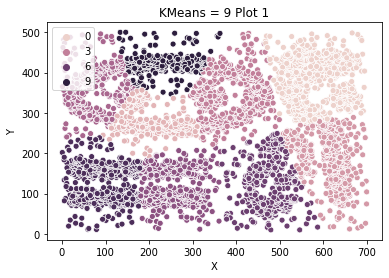

K = 9 Model 1 Entropy: (1.7839320578945217, 0.17179294823705926)
K = 9 Model 1 Variance: 3.1029067002161916


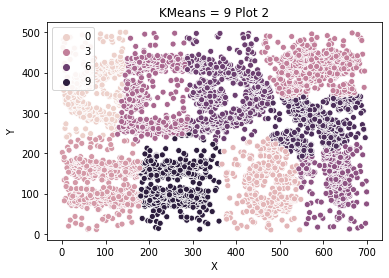

K = 9 Model 2 Entropy: (1.7801903470511733, 0.09177294323580895)
K = 9 Model 2 Variance: 3.990671237255908


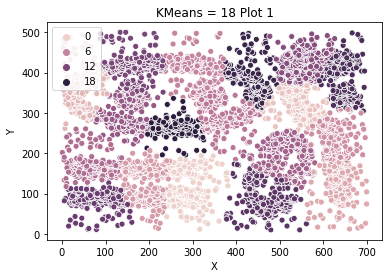

K = 18 Model 1 Entropy: (1.5004776606555117, 0.06426606651662915)
K = 18 Model 1 Variance: 3.32105416978134


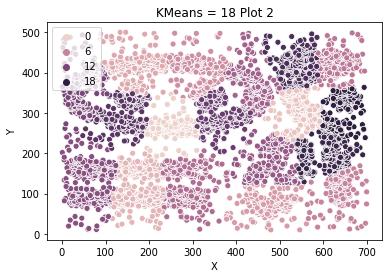

K = 18 Model 2 Entropy: (1.638052083056922, 0.0380095023755939)
K = 18 Model 2 Variance: 3.4482458913871534


In [19]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv("Complex9_RN32.csv")

X = df[['X', 'Y']]
Y = list(df['CLASS'])

x = df['X']
y = df['Y']

kmeans = KMeans(n_clusters = 9) #Declare number of clusters

for i in range(2):
    kModel = kmeans.fit(X)
    KModel = list(kModel.labels_)
    
    plot = sns.scatterplot(x = x, y = y, data=df, hue=KModel)
    plt.title('KMeans = 9 Plot '+ str(i+1))
    plt.show()
    
    print('K = 9 Model', i+1, 'Entropy:', entropy(KModel, Y))
    print('K = 9 Model', i+1, 'Variance:', variance(KModel, Y))
    
kmeans = KMeans(n_clusters = 18) #Declare number of clusters

for i in range(2):
    kModel = kmeans.fit(X)
    KModel = list(kModel.labels_)
    
    plot = sns.scatterplot(x = x, y = y, data=df, hue=KModel)
    plt.title('KMeans = 18 Plot '+ str(i+1))
    plt.show()
    
    print('K = 18 Model', i+1, 'Entropy:', entropy(KModel, Y))
    print('K = 18 Model', i+1, 'Variance:', variance(KModel, Y))
    
# Interpretation:

# The clusters for the k = 9 plots are significantly bigger than those for k = 18 and there are fewer k = 9 clusters. 

# Comparing the k = 9 plots, Plot 1 has even distribution of classification values throughout the plot, 
# while Plot 2 has consolidated lower classification values towards the origin / y-axis of the plot.

# Comparing the k = 18 plots, Plot 1 has even distribution of classification values throughout the plot, 
# while Plot 2 has consolidated higher classification values in the middle of the plot.

# Increasing the k value decreased our returned entropy value by .1 for both instances of our k = 18 plotting,
# and approximately halved our outlier percentages: k = 9 Plot 1 decreased from 0.109 to 0.054 in k = 9 Plot 1. This suggests
# that increasing the k value for KMeans Clustering decreases the number of outliers.


6. Run K-means for k=5 and k=10 for the WWQ dataset (set seed random_state=4335, before
running k-means and use n_init=15). Next, apply mdist---the function you wrote for task 4---to a
dataframe consisting of the first 11 attributes of the original White Wine Quality dataset,
obtaining a distance matrix D. Report SSE, entropy, ordinal ageement and variance (using the
12th and 13th attribute) of the 2 clustering results obtained. 

In [20]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

X = WWQ.values[:,0:11]
quality = WWQ.values[:, 11]
Class = WWQ.values[:, 12]

kmeans = KMeans(n_clusters=5, n_init=15, random_state=4335)

kModel5 = kmeans.fit(X)

KModel5 = list(kModel5.labels_)

kmeans = KMeans(n_clusters=10)

kModel10 = kmeans.fit(X)

KModel10 = list(kModel10.labels_)

ClassLetters = []

for num in list(Class):
    
    num = int(num)
        
    if(num == 1):        
        ClassLetters.append('A')
        #A
        
    elif(num == 2):
        ClassLetters.append('B')     
        #B
        
    elif(num == 3):
        ClassLetters.append('C')     
        #C
        
    elif(num == 4):
        ClassLetters.append('D')     
        #D
        
    elif(num == 5):
        ClassLetters.append('E')
        #E
        
qualityLetters = []
        
for num in quality:
        
    if(8 <= num and num <= 10):        
        qualityLetters.append('A')
        #A
        
    elif(num == 7):
        qualityLetters.append('B')    
        #B
        
    elif(num == 6):
        qualityLetters.append('C')   
        #C
        
    elif(num == 5):
        qualityLetters.append('D')   
        #D
        
    elif(0 <= num and num <= 4):
        qualityLetters.append('E') 
        #E

original = pd.read_csv("winequality-white.csv")

original = original.drop("quality", axis=1)
#d.columns = ['fixedAcidity', 'volatileAcidity', 'citricAcid', 'residualSugar', 'chlorides', 'freeSulfurDioxide', 'totalSulfurDioxide', 'density', 'pH', 'sulphates', 'alcohol']

print('Original WWQ First 11 Attributes Distance matrix:\n', mdist(original), '\n')

#SSE:

def SSE(a, b):
    
    SSE = 0
    
    for i in range(len(a)):
        SSE += ((int(a[i]) - int(b[i]))**2)
        
    return SSE

print('K = 5 Model Class SSE: ', SSE(KModel5, Class))
print('K = 10 Model Class SSE: ', SSE(KModel10, Class), '\n')

print('K = 5 Model Class Entropy: ', entropy(KModel5, ClassLetters))
print('K = 10 Model Class Entropy: ', entropy(KModel10, ClassLetters), '\n')
      
print('K = 5 Model Class Ord. Var.: ', ordinalVariation(KModel5, ClassLetters)) # need to change these to letters
print('K = 10 Model Class Ord. Var.: ', ordinalVariation(KModel10, ClassLetters), '\n')
      
print('K = 5 Model Class Variance: ', variance(KModel5, Class))
print('K = 10 Model Class Variance: ', variance(KModel10, Class), '\n')

print('K = 5 Model Quality SSE: ', SSE(KModel5, quality))
print('K = 10 Model Quality SSE: ', SSE(KModel10, quality), '\n')

print('K = 5 Model Quality Entropy: ', entropy(KModel5, quality))
print('K = 10 Model Quality: ', entropy(KModel10, quality), '\n')
      
print('K = 5 Model Quality Ord. Var.: ', ordinalVariation(KModel5, qualityLetters)) # need to change these to letters
print('K = 10 Model Quality Ord. Var.: ', ordinalVariation(KModel10, qualityLetters), '\n')
      
print('K = 5 Model Quality Variance: ', variance(KModel5, quality))
print('K = 10 Model Quality Variance: ', variance(KModel10, quality))



Original WWQ First 11 Attributes Distance matrix:
 [[ 0.         13.20462995 12.121102   ... 12.06281131 20.50178342
  19.23366214]
 [13.20462995  0.          7.24065736 ...  6.83693833  9.26831044
   9.49255503]
 [12.121102    7.24065736  0.         ...  9.28136319 12.7182734
  10.75331953]
 ...
 [12.06281131  6.83693833  9.28136319 ...  0.         11.15982165
  10.28800333]
 [20.50178342  9.26831044 12.7182734  ... 11.15982165  0.
   4.7067674 ]
 [19.23366214  9.49255503 10.75331953 ... 10.28800333  4.7067674
   0.        ]] 

K = 5 Model Class SSE:  19006
K = 10 Model Class SSE:  49773 

K = 5 Model Class Entropy:  (1.7032404277982165, 0.2272356063699469)
K = 10 Model Class Entropy:  (1.6633153982000957, 0.05839118007349939) 

K = 5 Model Class Ord. Var.:  65013.750171730506
K = 10 Model Class Ord. Var.:  14704.63365134432 

K = 5 Model Class Variance:  0.661070797081171
K = 10 Model Class Variance:  0.6186294874808781 

K = 5 Model Quality SSE:  85395
K = 10 Model Quality SSE:  562

7. Run DBSCAN for the Complex9-RN32 data set trying to find a clustering with the lowest
entropy (try to find good parameters by manual trial and error) with 20% or less outliers. Do the
same for the WWQ dataset minimizing the ordinal variation of the obtained clustering result;
again you can only have 20% or less outliers! Report the obtained 2 clustering results including
the entropy of the first result and ordinal-variation and entropy of the second result! Also
briefly describe how you found the two clusterings! 

In [75]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

#DBModel

df = pd.read_csv("Complex9_RN32.csv")

X = df[['X', 'Y']]
Y = list(df['CLASS'])

dbsc = DBSCAN(eps=20, min_samples = 22)

dbModel = dbsc.fit(X)

DBModel = list(dbModel.labels_)

dbKeys = list(Counter(DBModel).keys())

#print(len(dbKeys))

for i in range(len(DBModel)):
    DBModel[i] += 1
    
print('Complex9 Entropy: ', entropy(DBModel, Y),'\n')

# Finding Complex9_RN32 cluster values:

# There are 9 unique classification values for the CLASS column of Complex9_RN32, so I started experimenting with
# epsilon and min_samples values until I produced a DBModel with 9 clusters. I simply checked
# the unique values of the .labels_ array to count how many clusters were produced. I knew that matching
# the cluster number with our classification number would be a good start for greatly reducing the variance
# of our model, and I was successful, obtaining an outlier percentage of 9.3% (0.093)


# WWQ

X = WWQ.values[:,0:11]
Y = WWQ.values[:, 12]

dbsc = DBSCAN(eps=3, min_samples = 2)

dbModel = dbsc.fit(X)

DBModel = list(dbModel.labels_)

for i in range(len(DBModel)):
    DBModel[i] += 1
    
#dbKeys = list(Counter(DBModel).keys())

#print(len(dbKeys))
#print(dbKeys)

yLetters = []

for num in list(Y):
    
    num = int(num)
        
    if(num == 1):        
        yLetters.append('A')
        #A
        
    elif(num == 2):
        yLetters.append('B')     
        #B
        
    elif(num == 3):
        yLetters.append('C')     
        #C
        
    elif(num == 4):
        yLetters.append('D')     
        #D
        
    elif(num == 5):
        yLetters.append('E')
        #E
        
print('WWQ Entropy: ', entropy(KModel, yLetters))
print('WWQ Ord. Var.: ', ordinalVariation(KModel, yLetters))

# Finding WWQ cluster values:

# There are 5 unique classification values for the class column of WWQ, so I started experimenting with
# epsilon and min_samples values until I produced a DBModel with 6 clusters, the most accurate
# cluster number that I could obtain. I simply checked the unique values of the .labels_ array to count 
# how many clusters were produced. I knew that matching the cluster number with our 
# classification number would be a good start for greatly reducing the variance of our model, and I was successful, 
# obtaining an outlier percentage of 10.3% (0.103)



Complex9 Entropy:  (1.026090585992255, 0.0932733183295824) 

WWQ Entropy:  (1.6736809114111972, 0.10351163740302165)
WWQ Ord. Var.:  21729.049145980418


In [72]:
#cluster variance function for calculating clusterVariance for #8

def clusterVariance(a, c):
    
    clusterVar = []
    
    #print("Hello")
    
    a = list(a)
    
    totalFreq = list(Counter(a).values())    
    
    c = list(c)
    
    #print('A: ', a)
    
    #print(c)
    
    newA = a
    newC = c
    
    #for i in range(len(a)):
       #if(a[i] != 0):
            #newA.append(int(a[i]))
            #newC.append(int(c[i]))
            
    #print("newA: ", newA)
    #print("newC: ", newC)               
    
    aKeys = list(Counter(newA).keys())   
    
    aFreq = list(Counter(newA).values())    
    
    totalVar = 0
    
    for i in range(len(aKeys)):
        cVal = []
        cFreq = []
    
        for j in range(len(newC)):
            if(aKeys[i] == newA[j]):
            
                cVal.append(newC[j])
                
        #print('cVal: ', cVal)
        
        if(1 < len(cVal)):
        
            currVar = statistics.variance(cVal)
            
            clusterVar.append(currVar)            
        
    return clusterVar

8. Write a search procedure in Python that looks for the “best” K-means clustering for the
WWQ dataset—trying to minimize the variance of the 12th attribute, assuming k=8, by exploring
different distance metrics for the WWQ dataset. Distance metrics are modified by multiplying
the first 11 attributes of the WWQ dataset with weight vectors (a1,…,a11) with each weight
being a number in [0,), set random_state(123), and then running K-means 8 for the
transformed dataset. The search procedure you are supposed to develop returns the “best” KMeans clustering found—the one for which the variance is the lowest9—, the weight vector
used to obtain this result and the accomplished variance as well each cluster’s size and
variance; please limit the number of tested weight vectors to 5000 in your implementation!
Report the best clustering you found using this procedure. Also report the entropy and ordinal
variation of the best clustering(s) you found! What does this result/these results tell you about
the importance of the 11 attributes for predicting white wine quality? Explain how the search
procedure you deleloped works!

In [94]:
from sklearn.cluster import KMeans
import random

change = WWQ
quality = list(WWQ.values[:, 11])

for i in range(len(quality)):
    quality[i] -= 3

change = change.drop('quality', axis=1)
change = change.drop('class', axis=1)

for i in range(1000):
    
    weights = []

    for j in range(len(change.columns)):
        weights.append(random.randint(0, 100000))
        
    transform = weights * change

    KMeans(random_state=123)

    kmodel = KMeans(n_clusters=8).fit(transform)

    kModel = list(kmodel.labels_)

    currVar = variance(kModel, quality)

    if(i == 0):
        bestVariance = currVar
        bestWeights = weights
        bestModel = kmodel
        
    elif(currVar < bestVariance):
        bestVariance = currVar
        bestWeights = weights
        bestModel = kmodel
        
        
#print(bestVariance)
#print(bestWeights)
#print(bestModel)

KModel = list(bestModel.labels_)

clusters = list(Counter(kModel).keys())
clusterSizes = list(Counter(kModel).values())
clusterVar = clusterVariance(kModel, quality)

#print(clusters)
#print(clusterSizes)
#print(clusterVar)

columns = list(WWQ.columns)

for i in range(len(bestWeights)):
    print(columns[i], 'weight: ', bestWeights[i])

print('\nAccomplished Variance: ', bestVariance, '\n')

for i in range(len(clusterVar)):
    print('Cluster ',clusters[i]+1, 'size: ', clusterSizes[i], ', variance:', '%.4f'%clusterVar[i])
    
print('\nBest K Entropy: ', entropy(KModel, quality))
print('Best K Ord. Var.: ', ordinalVariation(KModel, qualityLetters))

# Importance of Attributes:

# We used 1000 tested weight vectors in our implementation.

# Our search function assigned the highest weights to alcohol, residual sugar, volatile acidity, and fixed acidity
# with assignments of 82948, 80167, 55814, and 53911 respectively. This suggests that these are the most important
# attributes for determining a wine's quality. Our search function assigned the lowest weights to citric acid,
# chlorides, and pH with assignments of 10830, 4763, and 2329 respectively. This suggests that these are the least
# important attributes for determining a wine's quality.

# Search Function explanation:

# We first parsed out our first 11 attributes from our WWQ dataset and the the quality attribute. We subtracted every
# value of our quality column by 3 to change the values from 3 - 9 to 0 - 6, so that we can parse out outliers in our
# ordinal variation and entropy functions.

# We created a for loop from 0 to 1000, in each of which we created a vector of 11 random weights between 0 and 100000. We
# then transformed our 11 attribute dataset by multiplying it by the weight vector. We then applied Kmeans to our transformed
# dataset with k = 8 and random_state = 123. We then calculated the variance of our transformed dataset by comparing it to
# the actual values of the WWQ quality column. We saved the variance of the first iteration as a variable called bestVariance,
# and then compared every iteration following it (999 tests), to the variable bestVariance. If the returned test weighted
# variance was lower than bestVariance, than that returned variance became the new bestVariance so that we end up with
# bestVariance being assigned to the lowest variance.

# Thus we obtained the model listed below with the best weights, an accomplished variance of 0.58, various cluster variances,
# and an outlier percentage of 15%.





fixedAcidity weight:  53911
volatileAcidity weight:  55814
citricAcid weight:  10830
residualSugar weight:  80167
chlorides weight:  4763
freeSulfurDioxide weight:  17118
totalSulfurDioxide weight:  45767
density weight:  28979
pH weight:  2329
sulphates weight:  41447
alcohol weight:  82948

Accomplished Variance:  0.583418079951086 

Cluster  2 size:  821 , variance: 0.6424
Cluster  3 size:  645 , variance: 0.8389
Cluster  5 size:  576 , variance: 0.7876
Cluster  8 size:  785 , variance: 0.4965
Cluster  7 size:  1096 , variance: 0.6887
Cluster  6 size:  498 , variance: 0.7977
Cluster  4 size:  378 , variance: 1.0840
Cluster  1 size:  99 , variance: 0.5380

Best K Entropy:  (1.6155977823367706, 0.15475704369130258)
Best K Ord. Var.:  17718.30526570048


9. Learn a linear model that predicts the 12th attribute using the first 11 attributes for the WWQ
dataset. Interpret the obtained coefficents of the obtained linear model and access its quality
of the obtained regression function and the importance of the 8 attributes. Compare this task’s
finding with the findings of the previous task! Next, learn a different prediction model of your
own liking10 for the same task. Report the mean squared error and the R2 for the two models
you obtained! Evaluate and compare the two results you obtained. 

In [96]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

X = WWQ.values[:,0:11]
quality = list(WWQ.values[:, 11])

for i in range(len(quality)):
    quality[i] -= 3
    
lmModel = LinearRegression().fit(X, quality)
lmModel.score(X, quality)
lmPrediction = list(lmModel.predict(X))

columns = ['Fixed Acidity', 'Volatile Acidity', 'Citric Acid', 'Residual Sugar', 'Chlorides', 'Free Sulfur Dioxide', 'Total Sulfur Dioxide', 'Density', 'pH', 'Sulphates', 'Alcohol']

for j in range(len(columns)):
    print(columns[j], 'model coefficient: ', '%.4f'%lmModel.coef_[j])

SVRModel = SVR(gamma='scale', C=1.0, epsilon=0.2)
SVRModel.fit(X, quality)
SVRPrediction = list(SVRModel.predict(X))

for i in range(len(lmPrediction)):
    lmPrediction[i] = int(lmPrediction[i])
    SVRPrediction[i] = int(SVRPrediction[i])
    
print("\nLinear Model R^2:", lmModel.score(X,quality))
print("Linear Model MSE:",mean_squared_error(quality, lmPrediction))
print('Linear Model Var:', variance(lmPrediction, quality), '\n')

print("Support Vector Regression R^2:", SVRModel.score(X,quality))
print("Support Vector Regression MSE:",mean_squared_error(quality, SVRPrediction))
print('Support Vector Regression Var:', variance(SVRPrediction, quality))

# Linear Model Quality & Importance of Attributes:

# The coefficient of determination of our Linear Regression Model (LRM) is relatively low at 0.282, indicating that the variance in our
# quality column / classification can not be well explained by our LRM. This suggests that our 
# LRM is lacking predictive power in producing accurate quality values from our first 11 attributes.

# However, we can still interpret the importance of each attribute from the regression coefficients produced:
# Residual sugar and alcohol are the greatest positive predictors of quality, with coefficient values of 0.4132 and 0.2381
# respectively. These values suggest that increasing the residual sugar and alcohol content of a wine will improve its quality.
# Volatile acidity and density are the greatest negative predictors of quality, with coefficient values of -0.1878 and -0.4494
# respectively. This suggests that increasing the volatile acidity and density of a wine will lower its quality score.


# Comparing to previous task:

# In a way, the weights of our previous task are similar to the regression coefficients produced from this task: the previous 
# task and this task both identified residual sugar and alcohol as the greatest positive predictors of a wine's quality
# by assigning them the highest weights and produced the highest regression coefficients for these two.
# However, the weights are different from the coefficents in a way: the weights identify the the impact / general importance
# of an attribute influencing a wine's quality, which is why citric acid, chlorides, and pH have such low values, while the
# regression coefficients are better at identifying positive and negative predictors.

# We rank the returned variances of each model as follows: LRM, Search Function, SVR, suggesting that the Search Function
# produces more accurate results than our LRM, but not as accurate as our SVR.


# Comparing LRM and SVR:

# Our support vector regression model (SVR) has a significantly higher coefficient of determination than our
# linear regression model (LRM), with 0.503 compared to 0.282 respectively. This suggests that the variance in our
# quality column / classification can be better explained by our SVM than our LRM. This suggests that our 
# SVM is a better predictor of producing accurate quality values from our first 11 attributes than LRM. 

# Also, MSE of our SVM is lower than that of our LRM, with 0.75 compared to 0.88 respectively. Thus, there are less differences
# between our SVM predicted quality values and our actual quality values, than the differences between our LRM predicted
# quality values & our actual quality values. This further suggests that our SVM is more accurate in predicting quality values.




Fixed Acidity model coefficient:  0.0553
Volatile Acidity model coefficient:  -0.1878
Citric Acid model coefficient:  0.0027
Residual Sugar model coefficient:  0.4132
Chlorides model coefficient:  -0.0054
Free Sulfur Dioxide model coefficient:  0.0635
Total Sulfur Dioxide model coefficient:  -0.0121
Density model coefficient:  -0.4494
pH model coefficient:  0.1036
Sulphates model coefficient:  0.0721
Alcohol model coefficient:  0.2381

Linear Model R^2: 0.2818703641342927
Linear Model MSE: 0.8821968150265415
Linear Model Var: 0.6137480470640709 

Support Vector Regression R^2: 0.5033744190811928
Support Vector Regression MSE: 0.750102082482646
Support Vector Regression Var: 0.4913455535597923


10. Summarize to which extend the K-Means and DBSCAN where able to rediscover the classes
in the COMPLEX9-RN32 and WWQ dataset!

#Summary

Complex9-RN32 K-Means:

The COMPLEX9 K-Means models with k=9 and k=18 produced in task 5 produced plots with high entropy
and relatively low outlier percentages (0.122 and 0.066), indicating that increasing k
reduces the number / influence of outliers. However, these models have very high variance, with
k = 9 plots having variance = ~3.840 and k = 18 plots having variance = ~2.99, indicating
these might not be the best plots for rediscovering the COMPLEX9 classes.

WWQ K-Means:

The WWQ K-Means models with k = 5 and k = 10 had much lower variance than those of COMPLEX9 K-Means
models, with 0.661 and 0.632 for k = 5 and k = 10 respectively. They also had decently low outlier
percentages with 0.23 for k = 5 and 0.15 for k = 10, indicating that K-Means is decent for 
rediscovering the classes of WWQ, or at least better than COMPLEX9.

Complex-9 and WWQ DBSCAN:

Our DBSCAN model for Complex9 had an entropy value of 1.03 and outlier percentage of 9%, while our WWQ DBSCAN model had an entropy value of 1.67 and outlier percentage of 10%, suggesting that DBSCAN is a better model for rediscovering COMPLEX9 classes.

Overall, DBSCAN is probably the best model for COMPLEX9-RN32 due to its low variance and outliers percentages, while K-Means is the best for WWQ due to the same reasons.
